In [4]:
from eeglib.helpers import CSVHelper

helper= CSVHelper("fake_EEG_signal.csv")

for eeg in helper:
    print(eeg.PFD())

[1.03089233 1.03229887 1.03181488 1.03123267 1.03069761]


In [3]:
!curl https://raw.githubusercontent.com/Xiul109/eeglib/master/Examples/fake_EEG_signal.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90199  100 90199    0     0   889k      0 --:--:-- --:--:-- --:--:--  889k


In [5]:
from eeglib.helpers import CSVHelper

helper= CSVHelper("fake_EEG_signal.csv", windowSize=256)

for eeg in helper:
    print(eeg.PFD())

[1.03922468 1.03897773 1.03971798 1.03674636 1.03873059]
[1.03848326 1.04168343 1.04094783 1.04168343 1.03699509]
[1.03996434 1.04045647 1.03996434 1.03774006 1.03947143]
[1.03749194 1.04045647 1.03897773 1.0402105  1.03873059]


In [6]:
from eeglib import wrapper, helpers

helper = helpers.CSVHelper("fake_EEG_signal.csv", windowSize=128)

wrap = wrapper.Wrapper(helper)

wrap.addFeature.HFD()
wrap.addFeature.getFourierTransform()
wrap.addFeature.synchronizationLikelihood()

features=wrap.getAllFeatures()

AttributeError: '_FeatureAdder' object has no attribute 'getFourierTransform'

In [8]:
wrap.getAllFeatures()

,HFD(){}_0,HFD(){}_1,HFD(){}_2,HFD(){}_3,HFD(){}_4
window_id,,,,,
0,2.075391,2.071034,2.121366,2.113046,2.122448
1,2.165376,2.127756,2.142201,2.185759,2.142667
2,2.088513,2.126656,2.119470,2.101255,2.122609
3,2.132532,2.147984,2.123692,2.176121,2.180053
4,2.119542,2.149438,2.103158,2.072021,2.122049
5,2.152988,2.141881,2.150179,2.176188,2.149479
6,2.129761,2.104530,2.093110,2.110664,2.092894
7,2.176519,2.149823,2.146592,2.109823,2.123788


In [1]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 3.9 MB/s            
     |████████████████████████████████| 4.3 MB 7.8 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import imageio

hdr_path = "xmFRAANN.hdr"
img = imageio.imread(hdr_path) # returns a tuple

img = np.array(img)

ValueError: Could not find a backend to open `xmFRAANN.hdr`` with iomode `ri`.

In [11]:
import cv2
import numpy as np
hdr_path = "xmFRAANN.hdr"
filename = hdr_path
im = cv2.imread(filename, cv2.IMREAD_ANYDEPTH)

tonemapDurand = cv2.xphoto.createTonemapDurand(2.2)
#cv2.createTonemapReinhard(2.2)
ldrDurand = tonemapDurand.process(im)

im2_8bit = np.clip(ldrDurand * 255, 0, 255).astype('uint8')

new_filename = filename + ".jpg"
cv2.imwrite(new_filename, im2_8bit)

AttributeError: module 'cv2' has no attribute 'xphoto'

In [1]:
# Tonemap using Drago's method to obtain 24-bit color image
hdr_path = "xmFRAANN.hdr"
filename = hdr_path
im = cv2.imread(filename)
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(im)
ldrDrago = 3 * ldrDrago
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)

NameError: name 'cv2' is not defined

In [2]:
tonemap = cv2.createTonemap(2.2)
ldr = tonemap.process(im)

NameError: name 'cv2' is not defined

In [3]:
img = cv2.imread(hdr_path, flags=cv2.IMREAD_ANYDEPTH)

NameError: name 'cv2' is not defined

In [4]:
img

NameError: name 'img' is not defined

In [5]:
from OpenImageIO import ImageBuf

img = ImageBuf(hdr_path)

# OpenImageIO has a lot of handy functions for manipulating
# and writing the image back out.
# You could also get a numpy array for the pixel data with:
img.get_pixels()

ModuleNotFoundError: No module named 'OpenImageIO'

In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = open("xmFRAANN.hdr", 'r')
data = f.read()
print (data)

for line in f:
    columns = line.split()
    time = float(columns[2])
    print (time)

f.close()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 46: invalid start byte

In [19]:
import array
import smc.freeimage as fi
from PIL import Image
import numpy as np
import cv2

def gamma_correction(a, gamma):
	return np.power(a, 1/gamma)

def load_hdr(file):
	img = fi.Image(file).flipVertical()

	size = img.height * img.pitch
	raw = img.getRaw()
	floats = array.array('f', raw)

	a1 = np.array(floats).reshape((img.width, img.height, 3))
	a2 = np.clip(gamma_correction(a1, 2.2), 0, 1)
	return (a2 * 255).astype(np.uint8)

def save_image(file, image):
	img2 = Image.fromarray(image)
	img2.save(file)

image = load_hdr("xmFRAANN.hdr")
save_image('grace_probe.png', image)


ModuleNotFoundError: No module named 'smc'

In [21]:
!pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 5.9 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [36]:
import nibabel as nb
hdr = nb.load("xmFRAANN.hdr")

In [37]:
print(hdr.header)

<class 'nibabel.nifti1.Nifti1PairHeader'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 144   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.    0.47  0.47  1.2   0.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : 0
descrip         : b'Bias Corrected'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 119.765625
qoffset_y       : -119.765625
qoffset_z       

In [38]:
t1_hdr =hdr
print(hdr.keys())

AttributeError: 'Nifti1Pair' object has no attribute 'keys'

In [39]:
print(hdr.get_qform())

[[  -0.47          0.            0.          119.765625  ]
 [   0.            0.47          0.         -119.765625  ]
 [   0.            0.            1.20000005  -85.80005646]
 [   0.            0.            0.            1.        ]]


In [40]:
print(hdr.get_sform())

[[  -0.46875       0.            0.          119.765625  ]
 [   0.            0.46875       0.         -119.765625  ]
 [   0.            0.            1.20000076  -85.80005646]
 [   0.            0.            0.            1.        ]]


In [43]:
import nibabel as nb
img = nb.load("xmFRAANN.img")
img_data =img.get_fdata()


In [44]:
img_data.shape

(512, 512, 144)

In [46]:
f_img = nb.load("xmFRAANN.img")
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(512, 512, 144)
(0.47, 0.47, 1.2)
('mm', 'sec')


In [59]:
512/2

256.0

In [52]:
mid_vox = img_data[253:259, 253:259, 70:74]
print(mid_vox)

[[[439.16722988 438.00541181 419.84436096 382.54388613]
  [421.8622555  418.31565297 400.27689875 373.98312141]
  [416.8480933  403.578908   377.1016857  355.76092223]
  [411.83393111 396.11881303 369.70273905 350.80790836]
  [409.32685002 400.88838194 384.13374243 363.95479703]
  [414.09641893 414.21871557 407.12551052 372.33211679]]

 [[456.10531436 445.03746855 429.32235046 411.34474456]
  [432.68550803 424.18589163 406.08598909 393.06139706]
  [422.71833197 415.50283028 391.41039244 379.66991511]
  [429.99498197 416.66464835 393.73402857 385.60130209]
  [443.44761224 427.5490492  410.61096473 403.64005632]
  [460.50799335 443.26416728 431.15680004 413.11804582]]

 [[486.49602909 453.29249166 422.96292524 411.03900296]
  [447.1165114  427.5490492  398.50359749 389.20905294]
  [429.81153702 421.37306894 395.99651639 381.81010629]
  [443.20301896 434.64225425 411.65048616 393.79517689]
  [471.33124588 456.53335259 432.19632147 417.82646642]
  [495.79057364 472.24847068 446.62732485 43

In [55]:
mid_slice_x = img_data[253, :, :]
print(mid_slice_x.shape)

(512, 144)


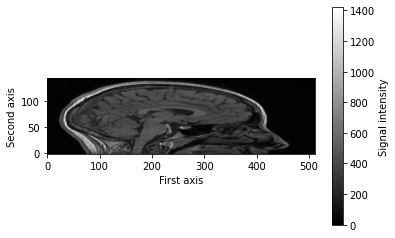

In [58]:
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [60]:
from nilearn.image import resample_to_img

resampled_stat_img = resample_to_img(stat_img, template)

ModuleNotFoundError: No module named 'nilearn'